<a href="https://colab.research.google.com/github/williamm243/customer-churn/blob/main/churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROBLEM STATEMENT

Customer churn is the behaviour of customers to stop using services or goods after sometime of using them. This projects aims to analyze and understand trends and patterns of customers who churn. This projects aims to build a machine learning model that can predict whether a customer will continue doing businnes with the specific providor.

## Main Objective

>> To build a machine learning model that predicts whether a customer will exit or not.


 ### Other/ Specific Objectives

 > To identify trends and patterns of customers who exited.

 > To choose, build and train a model that will predict whether a customer will exit or not.

 > To give recommendations.

In [ ]:
# Importing libraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib  inline


from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer, recall_score


## Data and Domain knowledge

The data used in this project is a dataset from kaggle, it is about a bank and the customers who stopped using its services it has variables such as country of customer, whether a customer has credit card and some details of their accounts.

In [ ]:
# Loading the dataset
df = pd.read_csv("Churn_Modelling.csv")

## 1.0 Preview of dataset

In [ ]:
#view the first 10 rows of the dataset
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44.0,8,113755.78,2,1.0,0.0,149756.71,1
6,7,15592531,Bartlett,822,NaN,Male,50.0,7,0.00,2,1.0,1.0,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29.0,4,115046.74,4,1.0,0.0,119346.88,1
8,9,15792365,He,501,France,Male,44.0,4,142051.07,2,0.0,NaN,74940.50,0
9,10,15592389,H?,684,France,Male,NaN,2,134603.88,1,1.0,1.0,71725.73,0


### Explanation of columns/ Domain Knowledge

In [ ]:
# checking column names
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

The bank customer churn dataset is a commonly used dataset for predicting customer churn in the banking industry. It contains information on bank customers who either left the bank or continue to be a customer. The dataset includes the following attributes:

Customer ID: Information that uniquely identifys a customer

Surname: The customer's surname or last name

Credit Score: A numerical value representing the customer's credit score

Geography: The country where the customer resides (France, Spain or Germany)

Gender: The customer's gender (Male or Female)

Age: The customer's age.

Tenure: The number of years the customer has been with the bank

Balance: The customer's account balance

NumOfProducts: The number of bank products the customer uses (e.g., savings account, credit card)

HasCrCard: Whether the customer has a credit card (1 = yes, 0 = no)

IsActiveMember: Whether the customer is an active member (1 = yes, 0 = no)

EstimatedSalary: The estimated salary of the customer

Exited: Whether the customer has churned (1 = yes, 0 = no)

In [ ]:
# checking the shape of the dataset
rows, columns = df.shape
print(f"This dataset has {rows} rows and {columns} columns")

This dataset has 10002 rows and 14 columns


In [ ]:
# Creating a function that checks for information about dataset
def information_of(dataframe):
    return dataframe.info()

In [ ]:
# Calling information function
information_of(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10002 non-null  int64  
 1   CustomerId       10002 non-null  int64  
 2   Surname          10002 non-null  object 
 3   CreditScore      10002 non-null  int64  
 4   Geography        10001 non-null  object 
 5   Gender           10002 non-null  object 
 6   Age              10001 non-null  float64
 7   Tenure           10002 non-null  int64  
 8   Balance          10002 non-null  float64
 9   NumOfProducts    10002 non-null  int64  
 10  HasCrCard        10001 non-null  float64
 11  IsActiveMember   10001 non-null  float64
 12  EstimatedSalary  10002 non-null  float64
 13  Exited           10002 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB


In [ ]:
#checking for data types
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                float64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard          float64
IsActiveMember     float64
EstimatedSalary    float64
Exited               int64
dtype: object

All the variables are in the correct data types

### Checking for null values

In [ ]:
# checking for null values
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          1
Gender             0
Age                1
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          1
IsActiveMember     1
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
### How to deal with null values

#Imputing
df['Geography'].fillna(df['Geography'].mode()[0], inplace=True)
df['Age'].fillna(df['Age'].median(), inplace=True)
df['HasCrCard'].fillna(df['HasCrCard'].mode()[0], inplace=True)
df['IsActiveMember'].fillna(df['IsActiveMember'].mode()[0], inplace=True)


In [ ]:
df.dropna(subset=["Geography"], inplace = True)

In [ ]:
#Dropping per column

df.dropna(subset=['Geography'], inplace=True)
df.dropna(subset=['Age'], inplace=True)
df.dropna(subset=['HasCrCard'], inplace=True)
df.dropna(subset=['IsActiveMember'], inplace=True)


In [ ]:
#Dropping all nun values

df.dropna(inplace=True)


In [ ]:
#checking if null values exists
df.isnull().sum().sum()


0

### Duplicates

In [ ]:
#detecting duplicates
#We use customer id because it is the only person unique identifier
df["CustomerId"].duplicated().sum()

2

In [ ]:
# Keep the last occurrence of duplicates
df.drop_duplicates(keep='last', inplace=True)


In [ ]:
#Checkiing duplicates
df["CustomerId"].duplicated().sum()

0

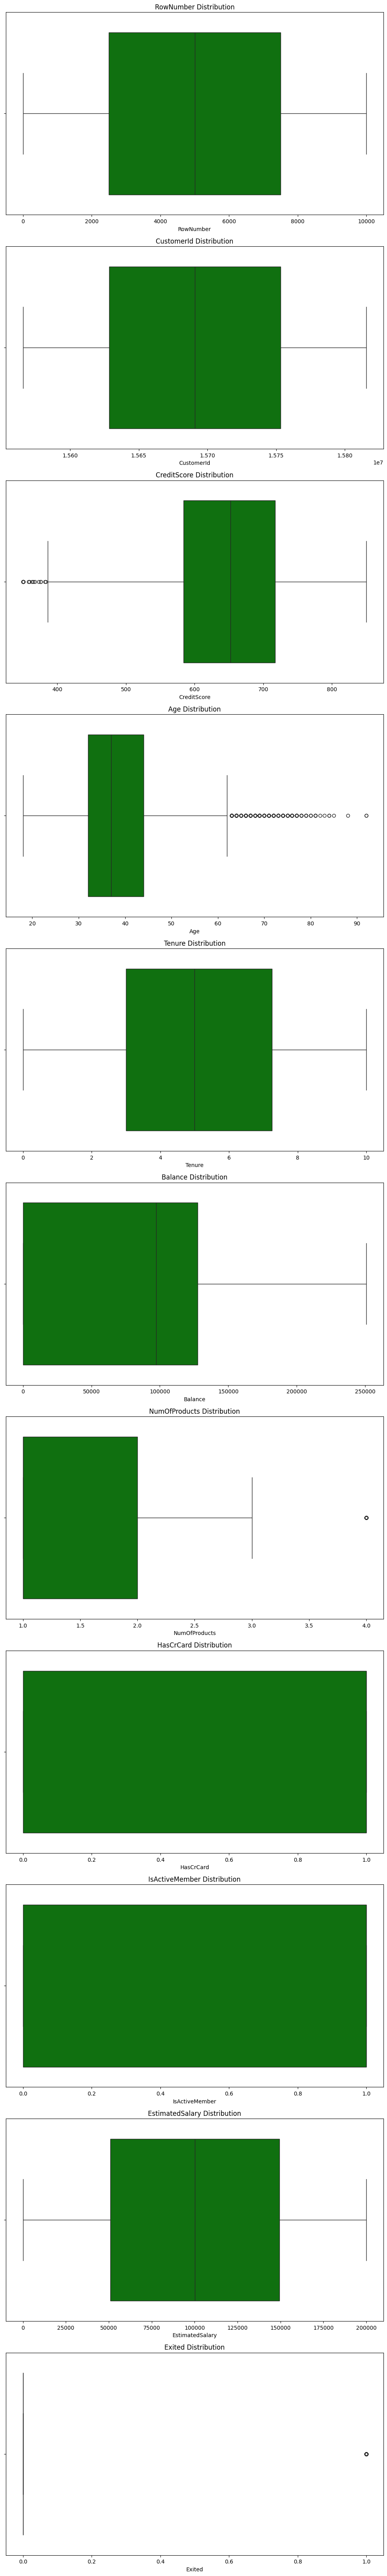

In [ ]:

#outliers
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns


fig, axes = plt.subplots(nrows=len(numerical_columns), figsize=(10, 6*len(numerical_columns)))

for i, column in enumerate(numerical_columns):
    sns.boxplot(data=df, x=column, color='green', ax=axes[i])
    axes[i].set_title(f'{column} Distribution')
    axes[i].set_xlabel(column)

plt.tight_layout()
plt.show()


## Summary Statistics

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,9996.0,5.002498e+03,2885.744618,1.00,2503.75,5002.50,7.501250e+03,10000.00
CustomerId,9996.0,1.569095e+07,71928.404913,15565701.00,15628551.00,15690738.00,1.575323e+07,15815690.00
CreditScore,9996.0,6.505033e+02,96.624668,350.00,584.00,652.00,7.172500e+02,850.00
Age,9996.0,3.892107e+01,10.488421,18.00,32.00,37.00,4.400000e+01,92.00
Tenure,9996.0,5.013305e+00,2.892353,0.00,3.00,5.00,7.250000e+00,10.00
Balance,9996.0,7.647626e+04,62397.118820,0.00,0.00,97173.29,1.276394e+05,250898.09
NumOfProducts,9996.0,1.530212e+00,0.581684,1.00,1.00,1.00,2.000000e+00,4.00
HasCrCard,9996.0,7.054822e-01,0.455849,0.00,0.00,1.00,1.000000e+00,1.00
IsActiveMember,9996.0,5.149060e-01,0.499803,0.00,0.00,1.00,1.000000e+00,1.00
EstimatedSalary,9996.0,1.001067e+05,57513.314398,11.58,51002.11,100238.11,1.494001e+05,199992.48


### CreditScore

The customer with the least Credit score had a credit score of 350 while the customer with the highest credit score had a credit score of 850.

### Age

The youngest customer was 18 years old while the oldest was 92 years old.

### Tenure

The shortest time span a person has spent as a customer of the bank is 0 years while the longest span is 10 years.

### Balance

The least amount of money in held in an account is 0 on the other hand the most amount of money held in a bank account is 250898.

### Number of Products used

The least number of products used by a customer is 1 while highest products used by a customer is 4.

### Estimated salary

The customer with the least estimated salary was estimated to earn 11 while the customers with the highest estimated salary was 199,992

## EDA

### Univariate analysis

In [ ]:
df['Exited'].value_counts()

Exited
0    7959
1    2037
Name: count, dtype: int64

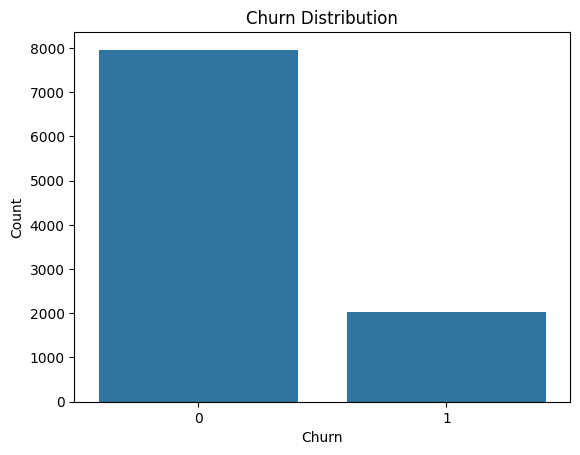

In [ ]:
# Churn Distribution
# plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Exited')
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()


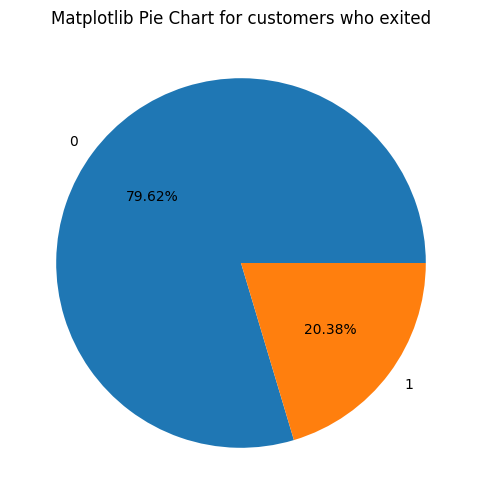

In [ ]:
#pie chart using matplotlib
exited = df["Exited"].value_counts()

plt.figure(figsize=(12,6))
plt.pie(exited, labels=exited.index,autopct='%1.2f%%')
plt.title('Matplotlib Pie Chart for customers who exited')
plt.show()

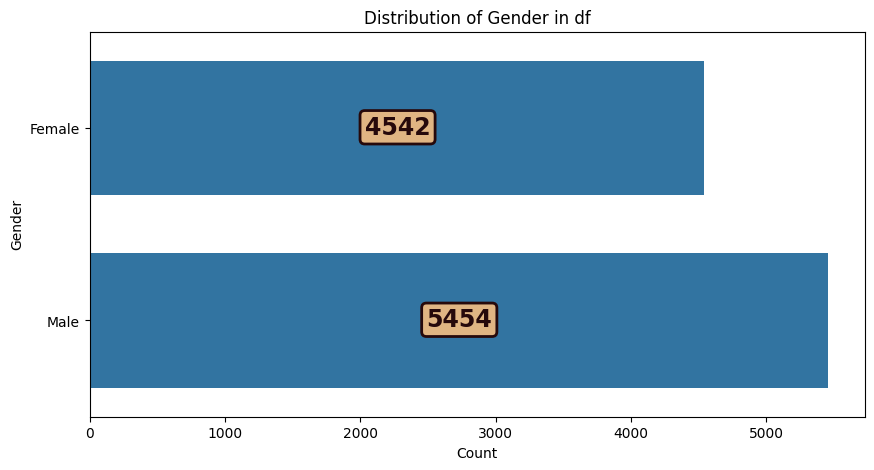

In [ ]:
fig = plt.figure(figsize=(10, 5))

p = sns.countplot(y="Gender", data=df, linewidth=2, width=0.7)

# Add text on top of the bars
for container in p.containers:
    plt.bar_label(container, label_type="center", color='#26090b', fontsize=17, weight='bold', padding=6, position=(0.5, 0.5),
                  bbox={"boxstyle": "round", "pad": 0.2, "facecolor": "#e0b583", "edgecolor": '#26090b', "linewidth": 2, "alpha": 1})

plt.title("Distribution of Gender in df")
plt.xlabel("Count")
plt.ylabel("Gender")

plt.show()

In [ ]:
value_counts = df.groupby(['Gender', 'Exited']).size().reset_index(name='Count')
print("Value Counts:")
print(value_counts)

Value Counts:
   Gender  Exited  Count
0       0       0   3403
1       0       1   1139
2       1       0   4556
3       1       1    898


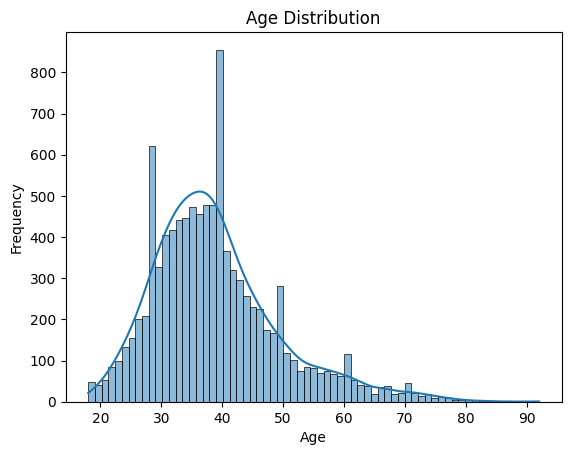

In [ ]:
# Univariate Analysis - Age Distribution
sns.histplot(df['Age'], kde= True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


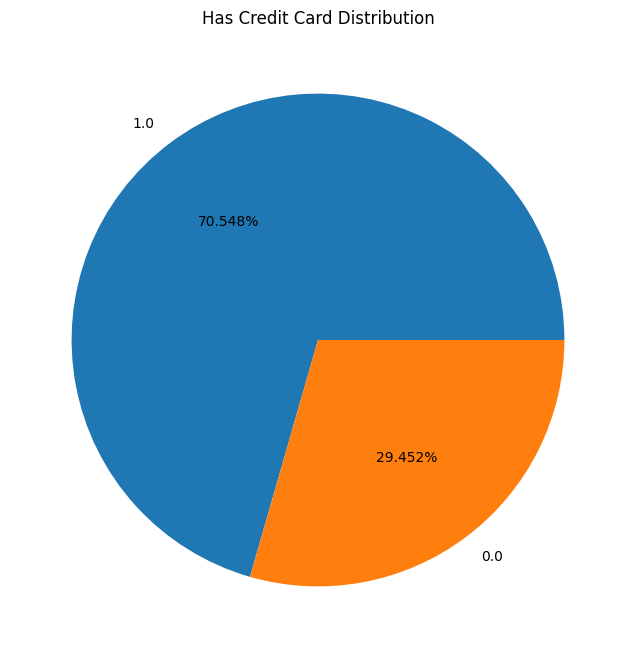

In [ ]:
# Univariate Analysis - Has Credit Card Distribution
plt.figure(figsize=(8, 8))
df['HasCrCard'].value_counts().plot.pie(autopct='%1.3f%%')
plt.title('Has Credit Card Distribution')
plt.ylabel('')
plt.show()


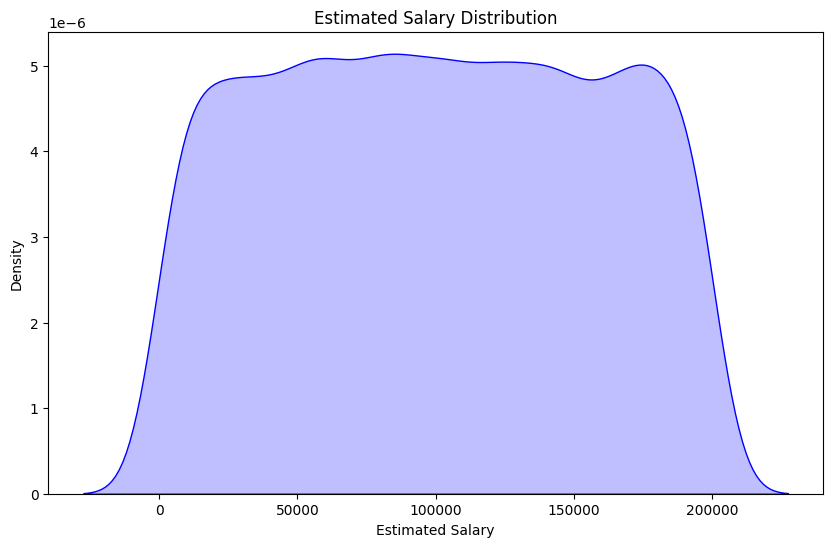

In [ ]:
# Univariate Analysis - Estimated Salary Distribution
plt.figure(figsize=(10, 6))
sns.kdeplot(df['EstimatedSalary'], fill=True, color='blue')
plt.title('Estimated Salary Distribution')
plt.xlabel('Estimated Salary')
plt.ylabel('Density')
plt.show()


## Bivariate analysis

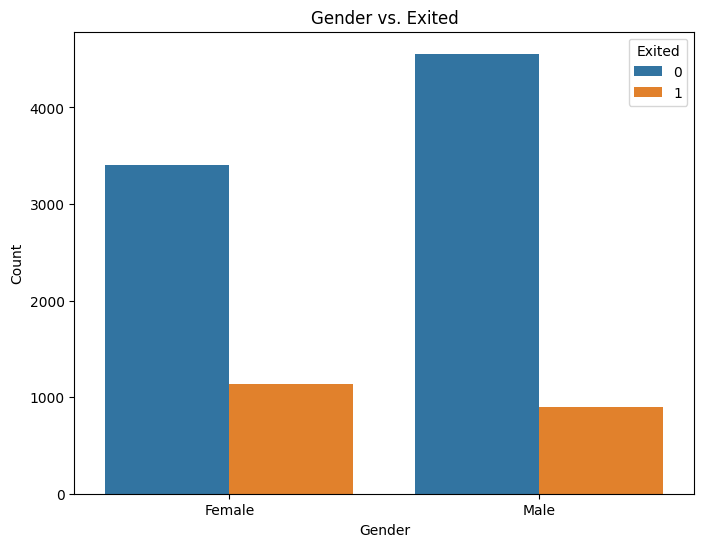

In [ ]:
# Bivariate Analysis - Gender vs. Exited
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Gender', hue='Exited')
plt.title('Gender vs. Exited')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


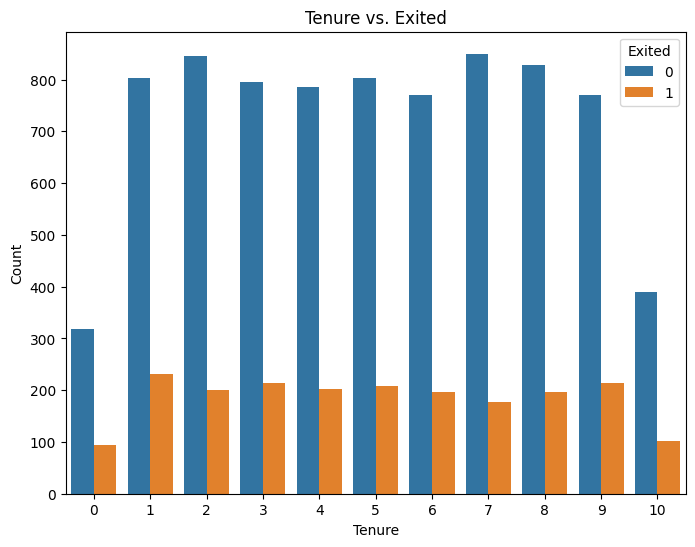

In [ ]:
#   tenure vs. Exited
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Tenure', hue='Exited')
plt.title('Tenure vs. Exited')
plt.xlabel('Tenure')
plt.ylabel('Count')
plt.show()


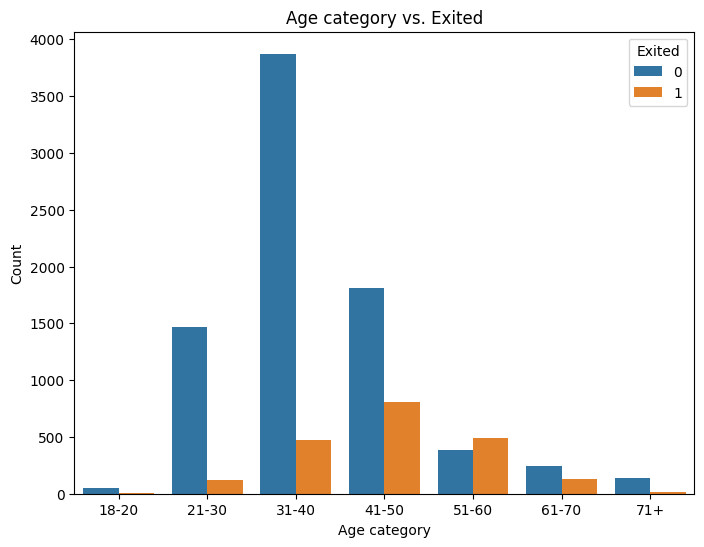

In [ ]:
#   tenure vs. Exited
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Age_Category', hue='Exited')
plt.title('Age category vs. Exited')
plt.xlabel('Age category')
plt.ylabel('Count')
plt.show()


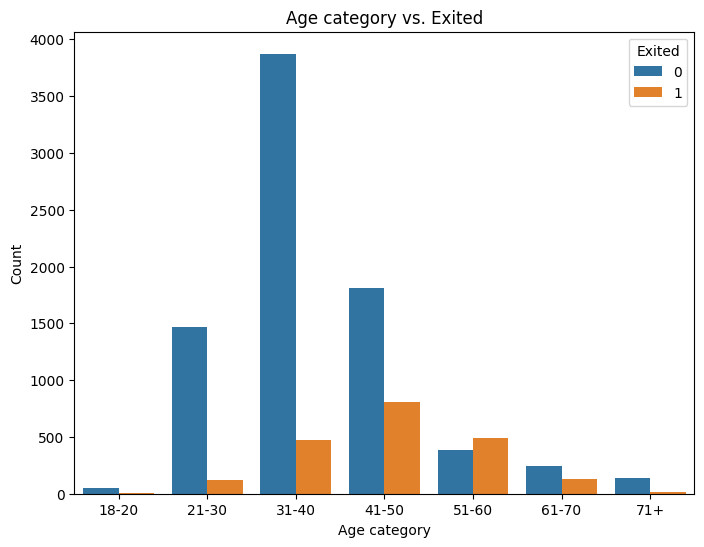

Value Counts:
   Age_Category  Exited  Count
0         18-20       0     46
1         18-20       1      3
2         21-30       0   1470
3         21-30       1    121
4         31-40       0   3873
5         31-40       1    473
6         41-50       0   1810
7         41-50       1    806
8         51-60       0    381
9         51-60       1    487
10        61-70       0    243
11        61-70       1    132
12          71+       0    136
13          71+       1     15


In [ ]:

# Create the count plot
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Age_Category', hue='Exited')
plt.title('Age category vs. Exited')
plt.xlabel('Age category')
plt.ylabel('Count')
plt.show()

# Get the value counts
value_counts = df.groupby(['Age_Category', 'Exited']).size().reset_index(name='Count')
print("Value Counts:")
print(value_counts)


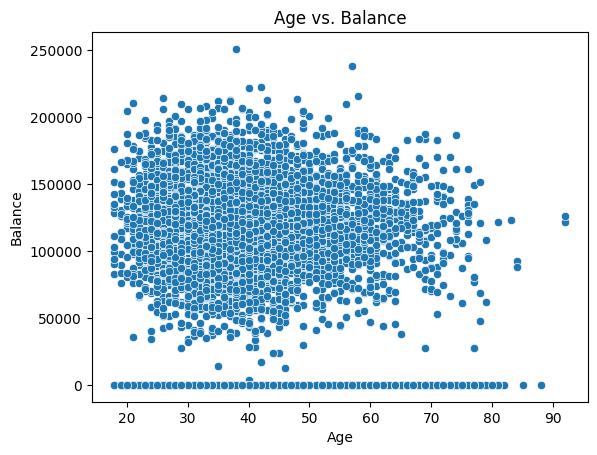

In [ ]:
# Age vs. Balance
sns.scatterplot(data=df, x='Age', y='Balance')
plt.title('Age vs. Balance')
plt.xlabel('Age')
plt.ylabel('Balance')
plt.show()


## Multvariate analysis

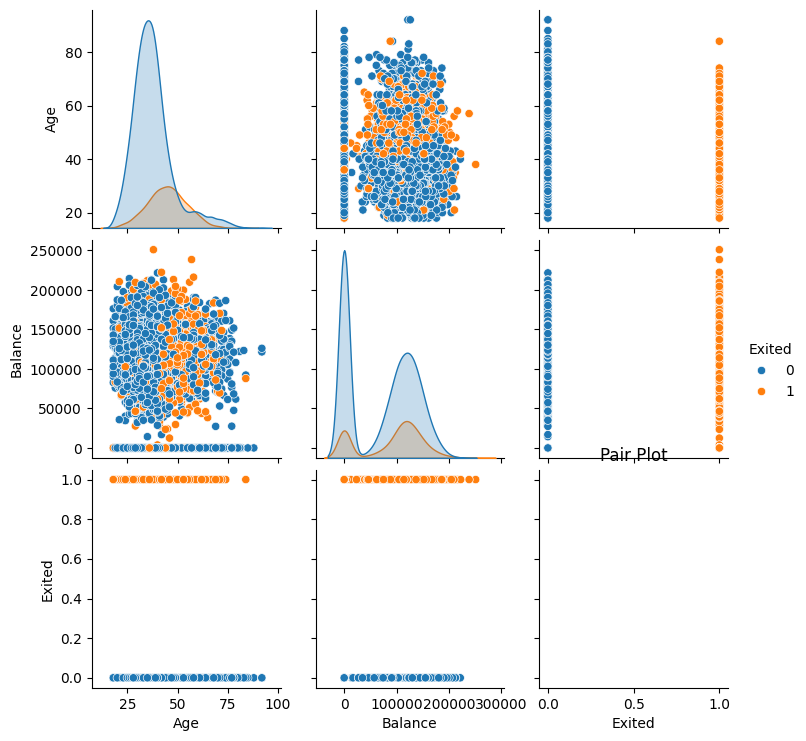

<Figure size 640x480 with 0 Axes>

In [ ]:
# Pair plot
sns.pairplot(data=df, vars=['Age', 'Balance', 'Exited'], hue='Exited')
plt.title('Pair Plot')
plt.show()
plt.tight_layout()

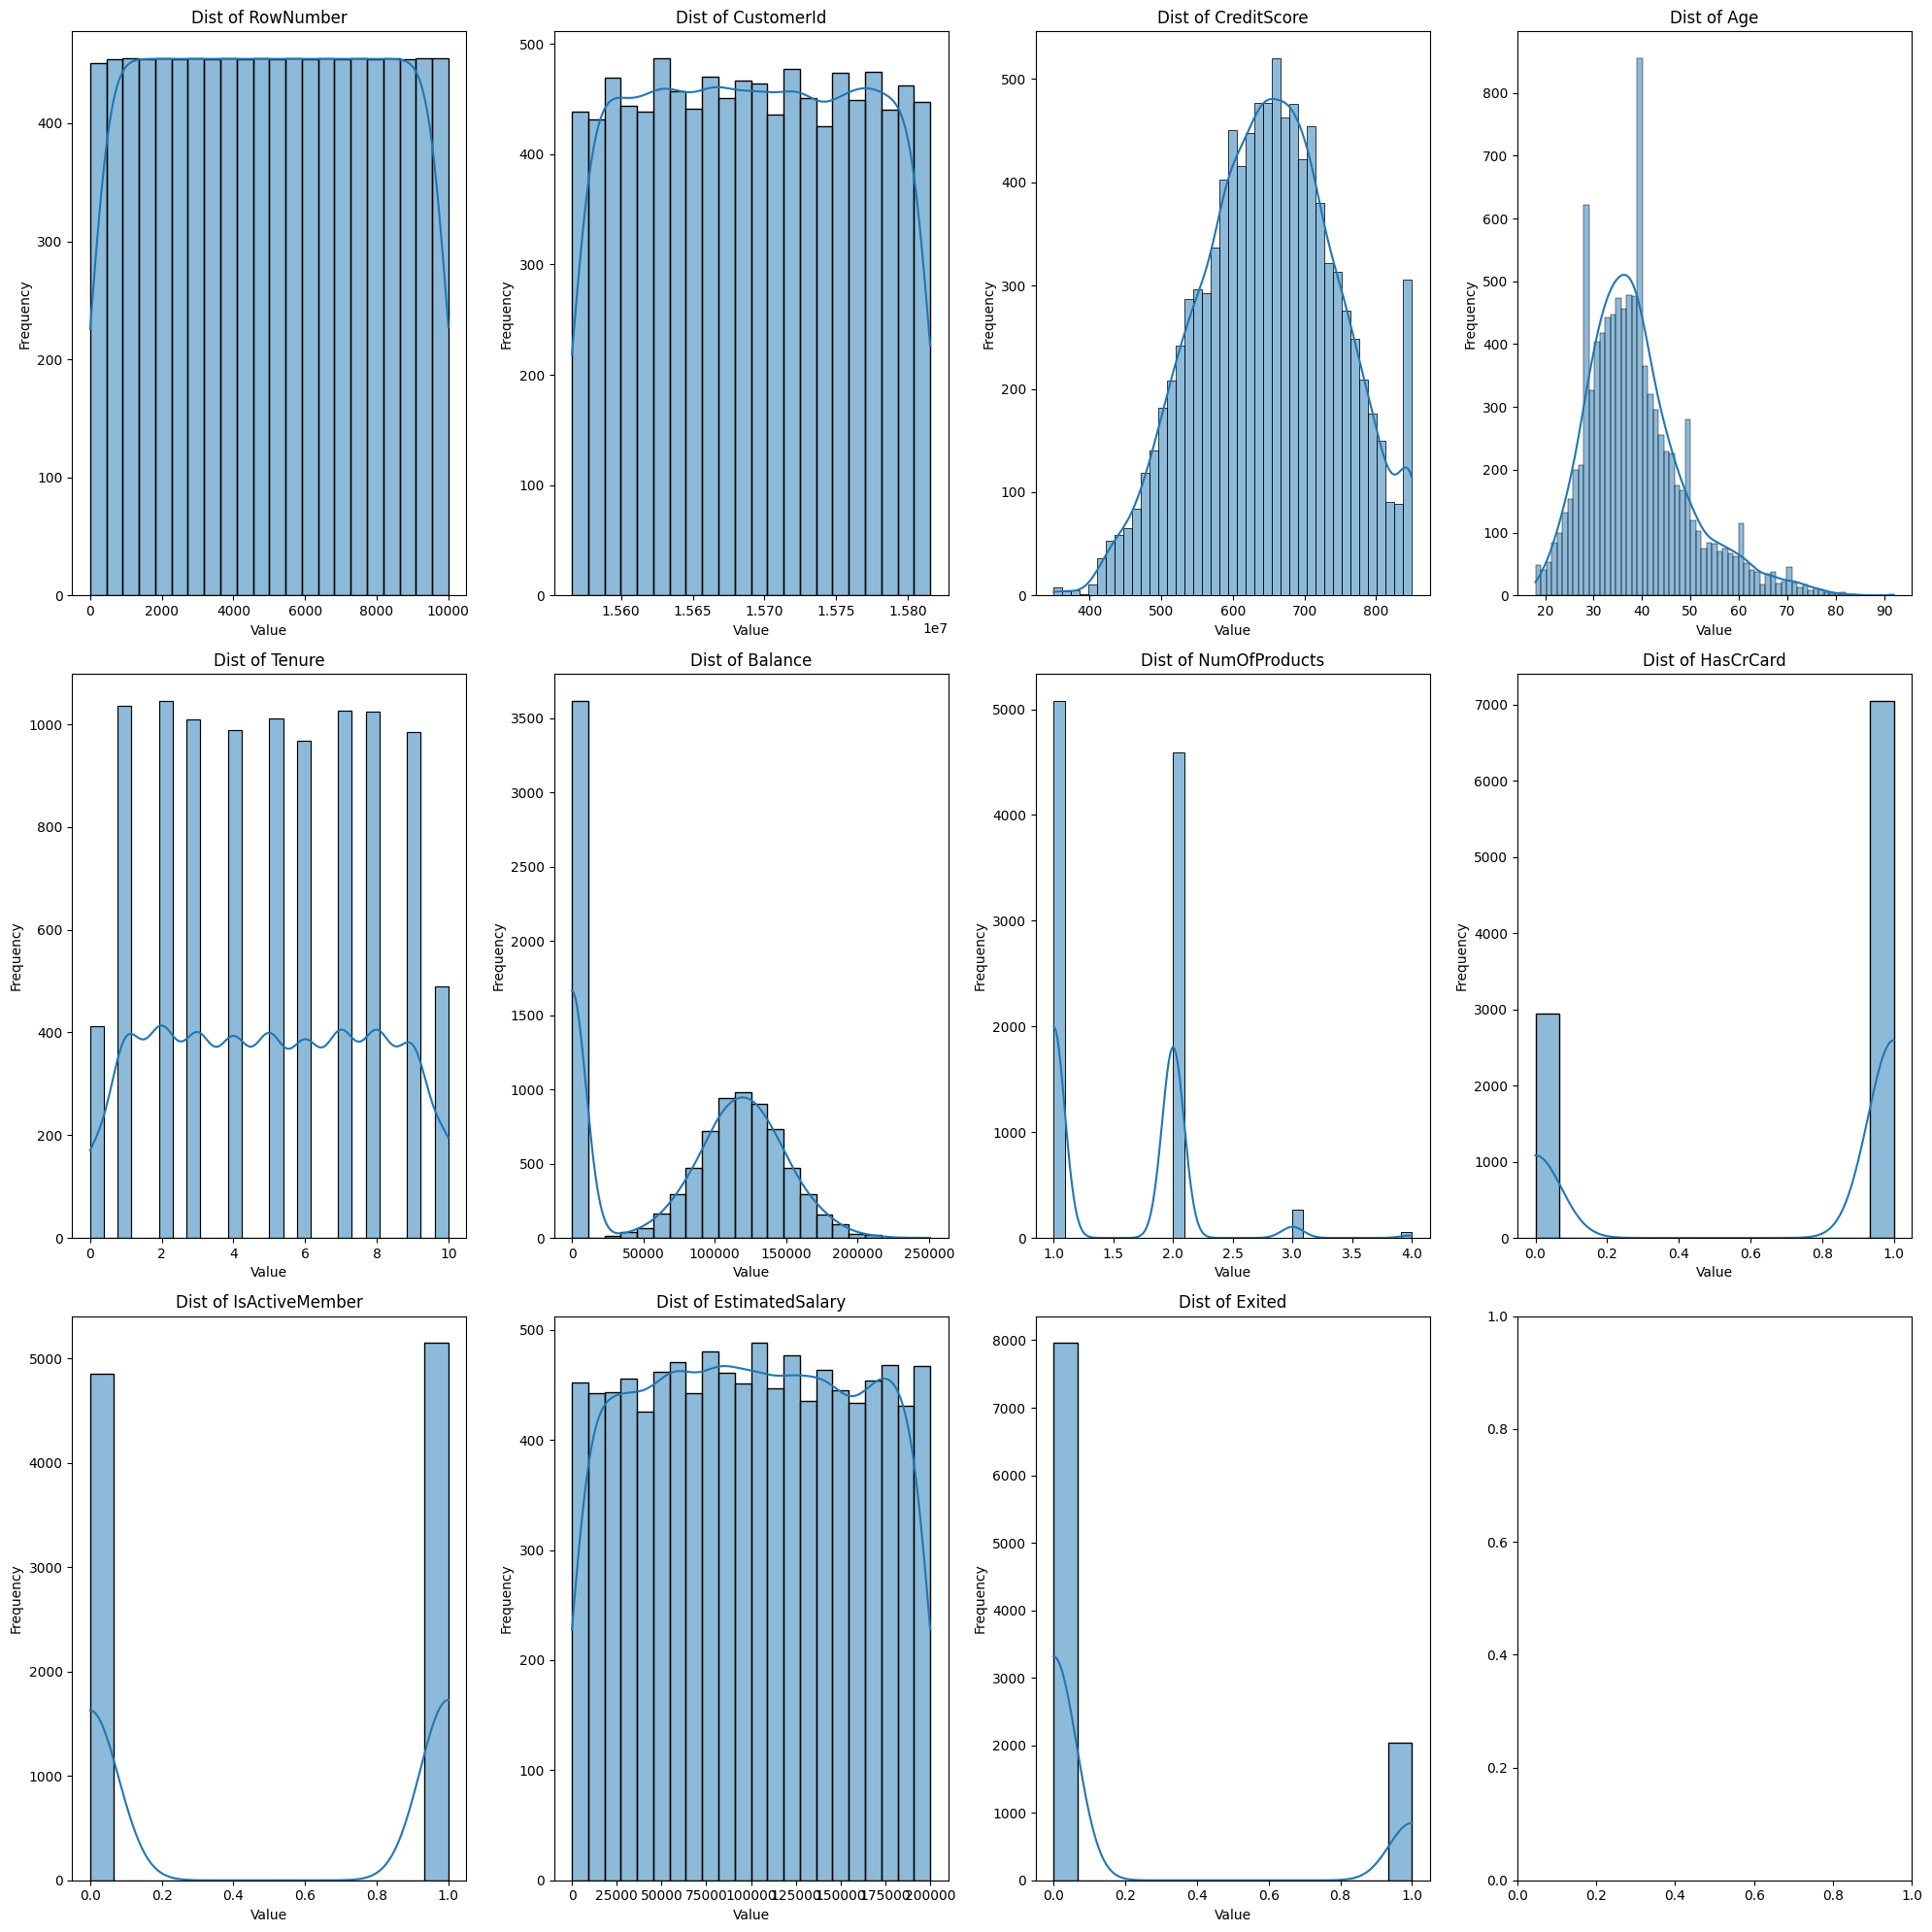

In [ ]:
fig, axs = plt.subplots(ncols=4, nrows=3, figsize=(20, 20))

for ax, col in zip(axs.ravel(), df.select_dtypes(include='number').columns):
    sns.histplot(df[col], kde=True, ax=ax)
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
    ax.set_title(f'Dist of {col}')


plt.tight_layout()
plt.show()

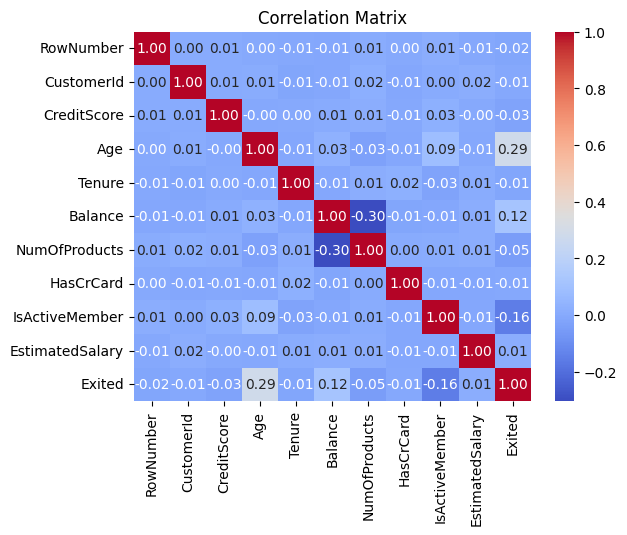

In [ ]:
# Select only numerical columns for correlation analysis
numerical_df = df.select_dtypes(include=['int64', 'float64'])

# Compute the correlation matrix
correlation_matrix = numerical_df.corr()

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Matrix')
plt.show()


## Feature Selection

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
5,6,15574012,Chu,645,Spain,Male,44.0,8,113755.78,2,1.0,0.0,149756.71,1


Categorical  Variables -

Numerical Variables-

Encoding is the process of converting categorical data into numerical format so that it can be used as input for machine learning

Label Encoding: In label encoding, each category is assigned a unique integer. For example, in the "Gender" column, "Male" might be encoded as 0 and "Female" as 1.

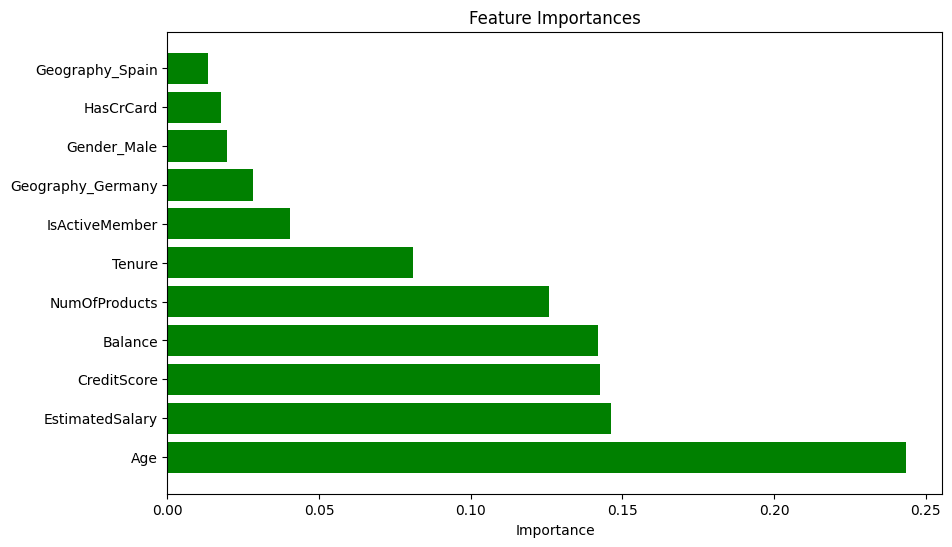

Top features: ['Age', 'EstimatedSalary', 'CreditScore', 'Balance', 'NumOfProducts']


In [ ]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# One-hot encoding for categorical variables
df_encoded = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)

# Drop non-numeric columns and the target variable 'Exited'
X = df_encoded.drop(['RowNumber', 'CustomerId', 'Surname', 'Exited'], axis=1)
y = df_encoded['Exited']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='green')
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()

# Select top features based on importance (e.g., top 5)
top_features = feature_importance_df['Feature'].head(5).tolist()
print("Top features:", top_features)


In [ ]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
# Dropping upi
df.drop(['RowNumber', 'CustomerId', 'Surname'] ,axis=1, inplace=True)

In [ ]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
5,645,Spain,Male,44.0,8,113755.78,2,1.0,0.0,149756.71,1
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39.0,5,0.00,2,1.0,0.0,96270.64,0
9996,516,France,Male,35.0,10,57369.61,1,1.0,1.0,101699.77,0
9997,709,France,Female,36.0,7,0.00,1,0.0,1.0,42085.58,1
9999,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1


In [ ]:

# Define age bins and corresponding labels
age_bins = [18, 20, 30, 40, 50, 60, 70, 100]
age_labels = ['18-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71+']

# Create a new column with age categories
df['Age_Category'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

# Display the modified DataFrame



       CreditScore  Geography  Gender   Age  Tenure    Balance  NumOfProducts  \
0              619          0       0  42.0       2       0.00              1   
1              608          2       0  41.0       1   83807.86              1   
2              502          0       0  42.0       8  159660.80              3   
3              699          0       0  39.0       1       0.00              2   
5              645          2       1  44.0       8  113755.78              2   
...            ...        ...     ...   ...     ...        ...            ...   
9995           771          0       1  39.0       5       0.00              2   
9996           516          0       1  35.0      10   57369.61              1   
9997           709          0       0  36.0       7       0.00              1   
9999           772          1       1  42.0       3   75075.31              2   
10001          792          0       0  28.0       4  130142.79              1   

       HasCrCard  IsActiveM

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_Category
0,619,0,0,42.0,2,0.00,1,1.0,1.0,101348.88,1,41-50
1,608,2,0,41.0,1,83807.86,1,0.0,1.0,112542.58,0,41-50
2,502,0,0,42.0,8,159660.80,3,1.0,0.0,113931.57,1,41-50
3,699,0,0,39.0,1,0.00,2,0.0,0.0,93826.63,0,31-40
5,645,2,1,44.0,8,113755.78,2,1.0,0.0,149756.71,1,41-50


In [ ]:
df['Exited'] = df['Exited'].replace({'Exited': 0, 'Not Exited': 1})

In [ ]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to Geography and Gender columns
df['Geography'] = label_encoder.fit_transform(df['Geography'])
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Age_Category'] = label_encoder.fit_transform(df['Age_Category'])

# Now you can use df for training your logistic regression model






In [ ]:
# Separate predictor and target variable
X = df.drop(columns=['Exited'])
y = df['Exited']

In [ ]:
# Split the data into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, predictions))
print("Classification Report:\n", classification_report(y_test, predictions))
print("confusion matrix: \n", confusion_matrix(y_test, predictions))


Accuracy: 0.786
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.97      0.88      1591
           1       0.37      0.06      0.11       409

    accuracy                           0.79      2000
   macro avg       0.58      0.52      0.49      2000
weighted avg       0.71      0.79      0.72      2000

confusion matrix: 
 [[1546   45]
 [ 383   26]]


In [ ]:

# Decision Tree Classifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)

print("Decision Tree Classifier:")
print("Accuracy:", accuracy_score(y_test, dt_predictions))
print("Classification Report:\n", classification_report(y_test, dt_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, dt_predictions))



Decision Tree Classifier:
Accuracy: 0.7765
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.85      0.86      1591
           1       0.46      0.50      0.48       409

    accuracy                           0.78      2000
   macro avg       0.66      0.67      0.67      2000
weighted avg       0.78      0.78      0.78      2000

Confusion Matrix:
 [[1348  243]
 [ 204  205]]


In [ ]:
# K-Nearest Neighbors (KNN) Classifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)

print("\nK-Nearest Neighbors (KNN) Classifier:")
print("Accuracy:", accuracy_score(y_test, knn_predictions))
print("Classification Report:\n", classification_report(y_test, knn_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, knn_predictions))



K-Nearest Neighbors (KNN) Classifier:
Accuracy: 0.7625
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.94      0.86      1591
           1       0.25      0.08      0.13       409

    accuracy                           0.76      2000
   macro avg       0.53      0.51      0.49      2000
weighted avg       0.69      0.76      0.71      2000

Confusion Matrix:
 [[1491  100]
 [ 375   34]]


In [ ]:
# Random Forest Classifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

print("\nRandom Forest Classifier:")
print("Accuracy:", accuracy_score(y_test, rf_predictions))
print("Classification Report:\n", classification_report(y_test, rf_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_predictions))





Random Forest Classifier:
Accuracy: 0.855
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.96      0.91      1591
           1       0.74      0.45      0.56       409

    accuracy                           0.85      2000
   macro avg       0.81      0.70      0.74      2000
weighted avg       0.84      0.85      0.84      2000

Confusion Matrix:
 [[1527   64]
 [ 226  183]]


In [ ]:
# Support Vector Machine (SVM) Classifier
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)

print("\nSupport Vector Machine (SVM) Classifier:")
print("Accuracy:", accuracy_score(y_test, svm_predictions))
print("Classification Report:\n", classification_report(y_test, svm_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, svm_predictions))


Support Vector Machine (SVM) Classifier:
Accuracy: 0.7955
Classification Report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89      1591
           1       0.00      0.00      0.00       409

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.63      0.80      0.70      2000

Confusion Matrix:
 [[1591    0]
 [ 409    0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print("Classification Report:\n", classification_report(y_test, predictions, zero_division=1))


Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.97      0.88      1591
           1       0.37      0.06      0.11       409

    accuracy                           0.79      2000
   macro avg       0.58      0.52      0.49      2000
weighted avg       0.71      0.79      0.72      2000



In [ ]:
# Gradient Boosting Classifier
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)
gb_predictions = gb_model.predict(X_test)

print("\nGradient Boosting Classifier:")
print("Accuracy:", accuracy_score(y_test, gb_predictions))
print("Classification Report:\n", classification_report(y_test, gb_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, gb_predictions))




Gradient Boosting Classifier:
Accuracy: 0.856
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.96      0.91      1591
           1       0.75      0.44      0.56       409

    accuracy                           0.86      2000
   macro avg       0.81      0.70      0.74      2000
weighted avg       0.85      0.86      0.84      2000

Confusion Matrix:
 [[1530   61]
 [ 227  182]]


In [ ]:
# AdaBoost Classifier
ada_model = AdaBoostClassifier()
ada_model.fit(X_train, y_train)
ada_predictions = ada_model.predict(X_test)

print("\nAdaBoost Classifier:")
print("Accuracy:", accuracy_score(y_test, ada_predictions))
print("Classification Report:\n", classification_report(y_test, ada_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, ada_predictions))




AdaBoost Classifier:
Accuracy: 0.851
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.95      0.91      1591
           1       0.71      0.46      0.56       409

    accuracy                           0.85      2000
   macro avg       0.79      0.71      0.74      2000
weighted avg       0.84      0.85      0.84      2000

Confusion Matrix:
 [[1512   79]
 [ 219  190]]


The best performing model is adaboost classifier

Precision (Exited): Precision measures the accuracy of the positive predictions. For customers who exited (class 1), the precision is 0.71, indicating that among all the instances predicted as exited, 71% were correctly classified as such.

Precision (Stayed): For customers who stayed (class 0), the precision is 0.87, indicating that among all the instances predicted as stayed, 87% were correctly classified as such.

Recall (Exited): Recall measures the ratio of correctly predicted customers who exited to all actual customers who exited. For customers who exited, the recall is 0.46, indicating that 46% of all actual customers who exited were correctly classified.

Recall (Stayed): For customers who stayed, the recall is 0.95, indicating that 95% of all actual customers who stayed were correctly classified.

F1-score (Exited): F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall. For customers who exited, the F1-score is 0.56.

F1-score (Stayed): For customers who stayed, the F1-score is 0.91.


Confusion Matrix:
The confusion matrix provides a tabular representation of actual vs. predicted class labels.
In this confusion matrix:
The top-left cell represents true negatives (TN): 1512 instances were correctly predicted as customers who stayed.

The top-right cell represents false positives (FP): 79 instances were incorrectly predicted as customers who exited.

The bottom-left cell represents false negatives (FN): 219 instances were incorrectly predicted as customers who stayed.

The bottom-right cell represents true positives (TP): 190 instances were correctly predicted as customers who exited.

Interpretation:

The model has achieved an overall accuracy of 0.851, indicating that it correctly predicted 85.1% of the instances.
Class 1 (Exited) has lower precision, recall, and F1-score compared to class 0 (Stayed), indicating poorer performance in predicting customers who exited.
Class 0 (Stayed) has higher precision, recall, and F1-score, suggesting better performance in predicting customers who stayed.
The confusion matrix provides additional insights into the model's performance, showing where it correctly and incorrectly predicted class labels.

### Hyper parameter tuning to improve adaboost classifier ability to recall

In [ ]:
# AdaBoost classifier
ada_model = AdaBoostClassifier()

#parameter grid to search through
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.5, 1.0]
}

# Define recall as the scoring metric for grid search
scorer = make_scorer(recall_score)

grid_search = GridSearchCV(estimator=ada_model, param_grid=param_grid, scoring=scorer, cv=5)

# Perform grid search
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_ada_model = AdaBoostClassifier(**best_params)
best_ada_model.fit(X_train, y_train)
ada_predictions = best_ada_model.predict(X_test)

print("\nBest AdaBoost Classifier after Hyperparameter Tuning:")
print("Accuracy:", accuracy_score(y_test, ada_predictions))
print("Classification Report:\n", classification_report(y_test, ada_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, ada_predictions))



Best AdaBoost Classifier after Hyperparameter Tuning:
Accuracy: 0.849
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.95      0.91      1591
           1       0.70      0.46      0.55       409

    accuracy                           0.85      2000
   macro avg       0.79      0.70      0.73      2000
weighted avg       0.84      0.85      0.84      2000

Confusion Matrix:
 [[1511   80]
 [ 222  187]]


### About the final model chosen (AdaBoost)

AdaBoost (Adaptive Boosting) is a popular ensemble learning method used for classification. It works by combining multiple weak learners to create a strong learner. Weak learners are models that perform slightly better than random guessing, such as decision trees with very limited depth (often called decision stumps). AdaBoost assigns weights to each instance in the dataset, where instances that are misclassified by the previous weak learners are given higher weights. This allows subsequent weak learners to focus more on the instances that were previously misclassified.

Some of the strengths of AdaBoost:

1. **High Accuracy**: AdaBoost tends to achieve high accuracy in classification tasks due to its ability to focus on difficult instances that are misclassified by previous weak learners.

2. **No Need for Complex Models**: AdaBoost can be effective with simple weak learners such as decision stumps, which are computationally inexpensive.

3. **Handles Imbalanced Data**: AdaBoost can handle imbalanced datasets well because it assigns higher weights to misclassified instances, allowing the model to focus more on minority classes.

4. **Reduced Overfitting**: AdaBoost combines multiple weak learners, which helps in reducing overfitting compared to using a single complex model.

However, AdaBoost also has some weaknesses:

1. **Sensitive to Noisy Data and Outliers**: AdaBoost can be sensitive to noisy data and outliers because it tries to fit all instances, including outliers, which can lead to overfitting.

2. **Computationally Intensive**: AdaBoost can be computationally intensive, especially when dealing with a large number of weak learners or when the dataset is large.

3. **Less Interpretable**: The final AdaBoost model is a combination of multiple weak learners, making it less interpretable compared to individual decision trees.

4. **Prone to Overfitting with Noisy Data**: While AdaBoost can reduce overfitting compared to individual weak learners, it can still overfit if the dataset contains noisy or irrelevant features.

Despite its weaknesses, AdaBoost remains a powerful and widely used algorithm in practice, especially in situations where high accuracy is required and computational resources are not a major constraint. It is commonly used in various applications such as text classification, face detection, and bioinformatics.

In [ ]:
import pickle

# Train the AdaBoost model
ada_model = AdaBoostClassifier()
ada_model.fit(X_train, y_train)

# Pickle the model
with open('ada_model.pkl', 'wb') as f:
    pickle.dump(ada_model, f)


In [ ]:
import streamlit as st
import pickle

# Load the pickled AdaBoost model
with open('ada_model.pkl', 'rb') as f:
    ada_model = pickle.load(f)

# Define a function to make predictions
def predict_exit(features):
    prediction = ada_model.predict(features)
    return prediction

# Streamlit UI
def main():
    st.title('Customer Exit Prediction')

    # Input features
    feature1 = st.slider('Credit Score', 300, 850, step=1)
    feature2 = st.selectbox('Geography', ['France', 'Germany', 'Spain'])
    feature3 = st.radio('Gender', ['Male', 'Female'])
    # Add more features as needed...

    # Convert features to DataFrame
    features = pd.DataFrame({
        'Credit Score': [feature1],
        'Geography': [feature2],
        'Gender': [feature3]
        # Add more features as needed...
    })

    # Make predictions
    if st.button('Predict'):
        prediction = predict_exit(features)
        st.write('Prediction:', prediction[0])

if __name__ == '__main__':
    main()


2024-04-08 08:20:56.721 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2024-04-08 08:20:56.724 Session state does not function when running a script without `streamlit run`


In [ ]:
!streamlit run streamlit_app.py


Usage: streamlit run [OPTIONS] TARGET [ARGS]...
Try 'streamlit run --help' for help.

Error: Invalid value: File does not exist: streamlit_app.py
